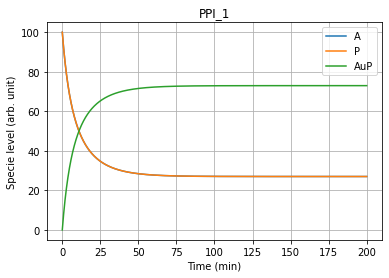

In [2]:
import numpy as np
from src.OdeModel import OdeModel
import src.reactions as re

PPI_Motif1 = OdeModel('PPI_1')
PPI_Motif1.addReaction(re.MassAction('A', 'P'))
PPI_Motif1.specieConc(['A', 'P'], [100, 100])

PPI_Motif1.simulate_beta(200)
PPI_Motif1.plot()


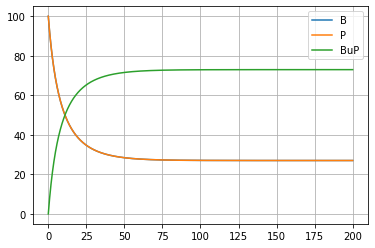

array([[1.00000000e+02, 9.99001049e+01, 9.98004191e+01, ...,
        2.70157149e+01, 2.70157148e+01, 2.70157148e+01],
       [1.00000000e+02, 9.99001049e+01, 9.98004191e+01, ...,
        2.70157149e+01, 2.70157148e+01, 2.70157148e+01],
       [0.00000000e+00, 9.98951112e-02, 1.99580867e-01, ...,
        7.29842851e+01, 7.29842852e+01, 7.29842852e+01]])

In [8]:
BPInteraction = OdeModel('BPInteraction')
# parameters are only specifically defined when needed
BPInteraction.addReaction(re.MassAction('B', 'P')) 
BPInteraction.specieConc(['B', 'P'], [100]*2)

BPInteraction.simulate_beta(200)
BPInteraction.plot()


In [9]:
print(PPI_Motif2.getParams())
print(PPI_Motif2.getStates())


ka_B_P,0.001
kd_BuP,0.01

B,100
P,100
BuP,0



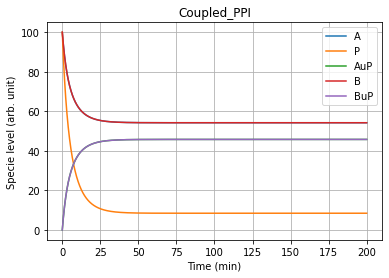

In [10]:
coupled_PPI = PPI_Motif1.combine(PPI_Motif2, 'Coupled_PPI')
coupled_PPI.simulate_beta(200)
coupled_PPI.plot()


In [11]:
hiddenNF = OdeModel('hiddenNF')
hiddenNF.addReaction(re.MichaelisMentenGeneral('B', 'BStar'))

hiddenNF = hiddenNF.combine(coupled_PPI, 'hiddenNF')
print(hiddenNF)


name: hiddenNF_1 | forward specie(s): B | backward specie(s): BStar | type: MichaelisMentenGeneral
name: hiddenNF_2 | forward specie(s): A P | backward specie(s): AuP | type: MassAction
name: hiddenNF_3 | forward specie(s): B P | backward specie(s): BuP | type: MassAction



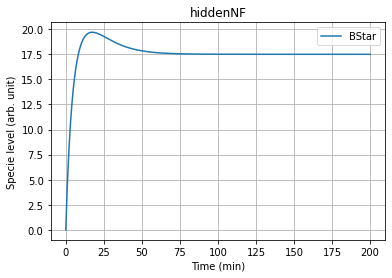

In [12]:
hiddenNF.addStimulator('hiddenNF_1', 'A')
hiddenNF.simulate_beta(200)
hiddenNF.plot(ignore_list=['A', 'B', 'P', 'BuP', 'AuP'])


Biphasic behaviour is caused by the hidden negative feedback of A to B

1.Varusai, T. M., Kolch, W., Kholodenko, B. N. & Nguyen, L. K. Protein–protein interactions generate hidden feedback and feed-forward loops to trigger bistable switches, oscillations and biphasic dose–responses. Mol. BioSyst. 11, 2750–2762 (2015).
